In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('../data/accre-gpu-jobs-2022-v2.csv', error_bad_lines=False)
warnings.filterwarnings('ignore')

b'Skipping line 124084: expected 12 fields, saw 13\nSkipping line 124809: expected 12 fields, saw 13\n'


In [3]:
df.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [4]:
df.shape

(336950, 12)

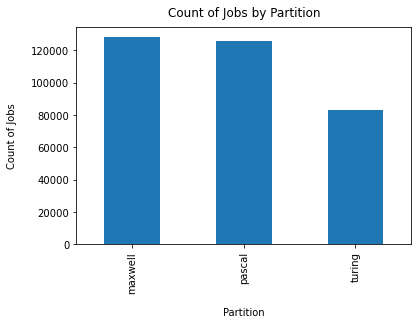

In [5]:
df.PARTITION.value_counts().plot(kind = 'bar' )
plt.xlabel("Partition", labelpad=14)
plt.ylabel("Count of Jobs", labelpad=14)
plt.title("Count of Jobs by Partition", y=1.02);

In [6]:
#List of all groups
print(df.ACCOUNT.unique())
print(' ')
print('Total number of accounts: '+str(df.ACCOUNT.nunique()))

['malanga' 'glasshouse' 'sunburst' 'virginia' 'harovin' 'antares' 'prince'
 'orange' 'grisette' 'horseradish' 'apple' 'pecans' 'pinole' 'clara'
 'pasilla' 'plumcot' 'kinnow' 'almonds' 'bunch' 'bertanne' 'cactus'
 'packham' 'summer' 'white' 'sugranineteen' 'gem' 'rosemarie']
 
Total number of accounts: 27


In [7]:
#How many unique ACCOUNTs use each PARTITION?
df.groupby('PARTITION')['ACCOUNT'].nunique()

PARTITION
maxwell     9
pascal     14
turing     14
Name: ACCOUNT, dtype: int64

Maxwell has the least number of groups using it. Pascal and Turing have equal number of groups using it. 

In [8]:
#How many unique USERs use each PARTITION?
df.groupby('PARTITION')['USER'].nunique()

PARTITION
maxwell     44
pascal     108
turing     111
Name: USER, dtype: int64

Maxwell has the least number of users. Pascal and Turing have rougly equal numbers of users.

#Observation: Maxwell has the least number of users but the most number of jobs. This suggests there are only a few number of groups that use Maxwell, but use it frequently enough to make Maxwell the most used partition.

In [9]:
#What are the number of jobs by ACCOUNT?
ct_acc = df.ACCOUNT.value_counts()
pct_acc = df.ACCOUNT.value_counts(normalize=True)*100
pd.concat([ct_acc, pct_acc], axis = 1, keys=['Count', 'Percentage'] )

,Count,Percentage
glasshouse,247125,73.341742
malanga,51677,15.336697
virginia,10342,3.069298
prince,7499,2.225553
grisette,5828,1.729633
harovin,5046,1.497552
antares,3222,0.956225
sunburst,1522,0.451699
pasilla,1362,0.404214
plumcot,1080,0.320522


In [186]:
#Make a table contingency table columns maxwell, turing, pascal, rows each account

#make bar plot showing bars in each partition for each account
pa_ac_ct=df.groupby('PARTITION')['ACCOUNT'].value_counts()
pa_ac_pct=df.groupby('PARTITION')['ACCOUNT'].value_counts(normalize=True)
tab2 = pd.concat([pa_ac_ct, pa_ac_pct], axis=1, keys=['Count', 'Percentage'])
tab2


Count  Percentage
PARTITION ACCOUNT                          
maxwell   glasshouse     126458    0.986196
          plumcot          1080    0.008422
          pasilla           431    0.003361
          clara             100    0.000780
          orange             79    0.000616
          bertanne           42    0.000328
          white              36    0.000281
          apple               1    0.000008
          summer              1    0.000008
pascal    malanga         51677    0.410947
          glasshouse      44933    0.357317
          virginia         9590    0.076262
          prince           7448    0.059228
          grisette         5828    0.046346
          antares          3136    0.024938
          sunburst         1522    0.012103
          pecans            628    0.004994
          kinnow            436    0.003467
          pasilla           425    0.003380
          rosemarie          56    0.000445
          horseradish        52    0.000414
          bertanne           13    0.000103
          packham             7    0.000056
turing    glasshouse      75734    0.912777
          harovin          5046    0.060816
          virginia          752    0.009063
          pasilla           506    0.006099
          almonds           221    0.002664
          apple             209    0.002519
          bertanne          166    0.002001
          cactus            117    0.001410
          antares            86    0.001037
          prince             51    0.000615
          sugranineteen      43    0.000518
          pinole             20    0.000241
          gem                19    0.000229
          bunch               1    0.000012

In [203]:
pa_ac_ct_t = pd.DataFrame(pa_ac_ct)
pa_ac_ct_t = pa_ac_ct_t.rename(columns={'ACCOUNT': 'Count'})
pa_ac_ct_t.reset_index(inplace=True)
pa_ac_ct_t

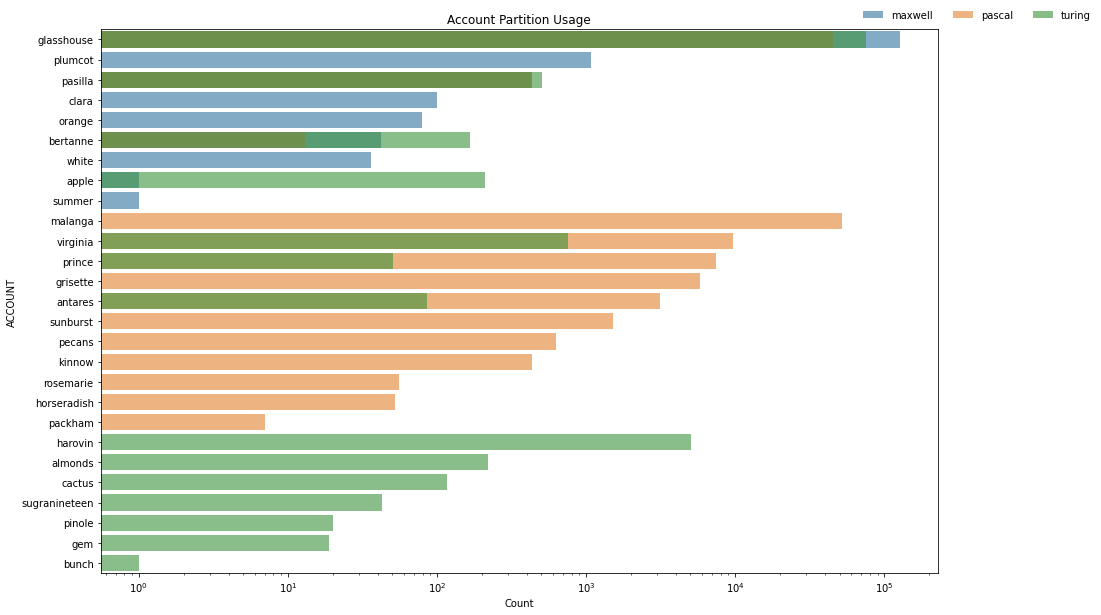

In [241]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(data=pa_ac_ct_t, x = 'Count', y = 'ACCOUNT', hue='PARTITION', log = True, ax = ax, dodge=False, alpha=0.6)

plt.legend(bbox_to_anchor=([0.9, 1, 0, 0]), ncol=4, frameon=False)
plt.title('Account Partition Usage')
plt.show()


#Observation: Glasshouse has the most number of all jobs, and is the top user for maxwell (98% of all maxwell jobs) and turing (91% of all turing jobs). Glasswell is the second top user for the pascal partition(35% of all pascal jobs). Malanga is the second top user for all jobs, and top user for the pascal partition (41% of all pascal jobs). Malanga only uses the pascal partition.

In [35]:
tab3 = (df.groupby(['ACCOUNT'])['PARTITION'].value_counts() / df.groupby('ACCOUNT')['PARTITION'].count())
tab3 = tab3.unstack(level=1)

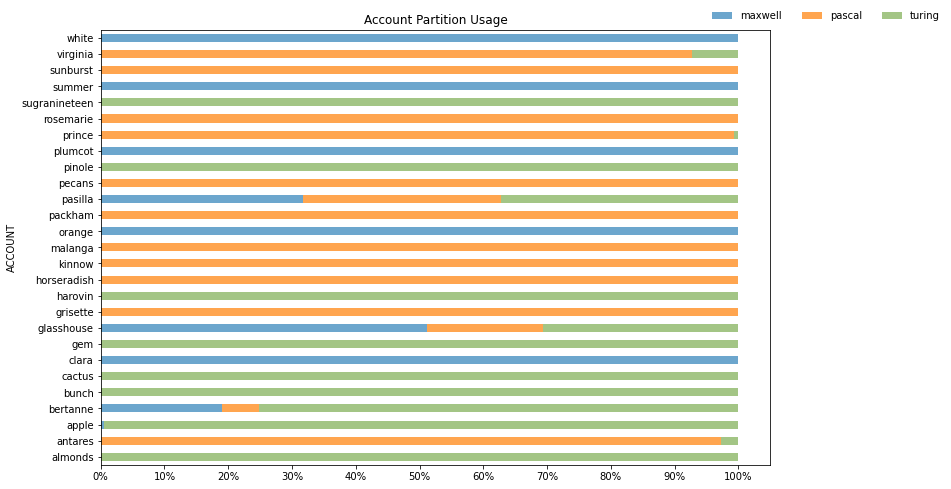

In [243]:
color = ('#6CA6CD',  '#FFA54F', '#A3C585')

ax = tab3.plot(kind = 'barh', stacked = True, ylabel = 'Percent', rot=0, color=color, figsize=(12,8))
xticks = np.arange(0,1.1,0.1)
xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels)
plt.legend(bbox_to_anchor=([0.9, 1, 0, 0]), ncol=4, frameon=False)
plt.title('Account Partition Usage')
plt.show();

#Observation: Most groups use primarily one partition , there is little variablitiy within each group for partition used. The groups that show variability in partition use are Pasilla, Glasshouse and Bertanne. Other groups primarily stick to one partition. The plot shows Maxwell is the least used partition across different groups, only showing up in 9 groups.

In [245]:
#ax = tab3.plot(kind='area', ylabel='Percent', rot=0, figsize=(10,10))

In [6]:
df.STATE.unique()

array(['COMPLETED', 'CANCELLED by 9201', 'CANCELLED by 859023',
       'CANCELLED by 153500', 'CANCELLED by 168618',
       'CANCELLED by 888717', 'FAILED', 'CANCELLED by 859269',
       'CANCELLED by 756088', 'CANCELLED by 887337',
       'CANCELLED by 858683', 'CANCELLED', 'CANCELLED by 885613',
       'CANCELLED by 342288', 'CANCELLED by 855431',
       'CANCELLED by 491383', 'CANCELLED by 776393',
       'CANCELLED by 844796', 'CANCELLED by 780767',
       'CANCELLED by 505355', 'CANCELLED by 649321',
       'CANCELLED by 890189', 'CANCELLED by 59229', 'CANCELLED by 649319',
       'CANCELLED by 590520', 'CANCELLED by 478095',
       'CANCELLED by 196703', 'CANCELLED by 308082',
       'CANCELLED by 757496', 'CANCELLED by 454080',
       'CANCELLED by 512947', 'CANCELLED by 762866',
       'CANCELLED by 859465', 'CANCELLED by 161909',
       'CANCELLED by 785491', 'CANCELLED by 90423', 'CANCELLED by 159541',
       'CANCELLED by 859439', 'CANCELLED by 349259',
       'CANCELLED by 

ACCRE has three scheduler partitions that groups can get access to which consist of machines each with 4 GPU cards. Each partition is named after the nvidia processor generation that it contains, from oldest to newest: maxwell, pascal, and turing. GPU nodes are requested per-GPU, and users can request up to 4 GPUs per node. For each GPU the user is allocated up to one quarter of the machine's RAM and CPU cores. All of the current GPU-accelerated hardware is also connected to a special high-speed RoCE (RDMA over converged ethernet) network allowing for memory sharing on large-scale multi-GPU jobs, so users can also request multiple servers for analysis that requires more than four GPU cards.

The main objectives of this project are to examine the following questions:
1. What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.
2. What is the distribution of the number of GPUs in each job (runtime-weighted) for each partition? What fraction of runtime-weighted and GPU-weighted jobs are using more than 4 GPUs and thus probably using the RoCE networking? Is this fraction different for each partition?
3. What is the total runtime usage per-gpu (i.e. multiply runtime by the number of gpus) in each of the 3 partitions over the last year?
4. What is the distribution of different groups and users accessing each partition? In each partition, who are the top users, and do they represent a majority of the runtime-weighted jobs on the partition?
5. Currently there is a 5 day limit on runtime for GPU jobs, although some users have been asking for extensions. What is the distribution of requested runtime and actual runtime on jobs on each partition? Do users really need more time, or are they simply always requesting the maximum?

In [7]:
#weigh jobs by runtime(usedtime), and show distribution of memory usage per GPU

In [8]:
#GPU
df.GPUS.unique()

array([ 1,  2,  4,  3,  8, 32, 24, 16, 18, 12,  6, 40, 60, 30, 20],
      dtype=int64)

In [9]:
df.GPUS.describe()

count    336950.000000
mean          1.088734
std           0.868473
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          60.000000
Name: GPUS, dtype: float64

In [10]:
df.USEDMEM.describe()

count     336950
unique    114062
top            0
freq       58747
Name: USEDMEM, dtype: object

In [11]:
df.USEDMEM

0          18.66M
1               0
2         402.32M
3         417.62M
4         450.09M
           ...   
336945          0
336946          0
336947          0
336948    145.24M
336949          0
Name: USEDMEM, Length: 336950, dtype: object

In [12]:
df['USEDMEM']= df["USEDMEM"].str.replace("M","")

In [13]:
df.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED


In [14]:
df.dtypes

JOBID        object
ACCOUNT      object
USER         object
USEDMEM      object
REQTIME      object
USEDTIME     object
NODES         int64
CPUS          int64
GPUS          int64
PARTITION    object
EXITCODE     object
STATE        object
dtype: object

In [15]:
df.USEDTIME.describe()

count       336950
unique       20818
top       00:00:00
freq         51083
Name: USEDTIME, dtype: object

In [16]:
df[df['USEDTIME'].str.contains('-')]

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
6,32880722,glasshouse,brady,0,3-12:00:00,3-12:00:07,1,1,1,pascal,0:0,COMPLETED
327,32884086,glasshouse,miya,374.89,5-00:00:00,1-08:38:34,1,1,1,pascal,0:0,COMPLETED
540,32885557,malanga,alwilda,7572.38,2-00:00:00,1-05:49:07,1,2,1,pascal,0:0,COMPLETED
784,32888937,virginia,almond,0,2-12:00:00,2-12:00:10,1,18,3,turing,0:0,COMPLETED
1004,32891492,glasshouse,erick,241.82,4-04:00:00,4-04:00:26,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336412,46636477,glasshouse,erick,0,4-04:00:00,1-22:51:47,1,1,1,pascal,0:0,RUNNING
336413,46636478,glasshouse,erick,0,4-04:00:00,1-22:51:47,1,1,1,pascal,0:0,RUNNING
336414,46636479,glasshouse,erick,0,4-04:00:00,1-22:51:47,1,1,1,pascal,0:0,RUNNING
336456,46647371,glasshouse,mel,0,3-08:00:00,1-09:55:00,1,20,8,turing,0:0,RUNNING


In [17]:
#replace - in usedtime with days

df.USEDTIME= df.USEDTIME.str.replace('-','days ',regex=True)

In [18]:
df['USEDTIMEtd'] = pd.to_timedelta(df['USEDTIME'])

In [19]:
df.head(5)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10


In [20]:
df['USEDTIME_SEC'] = df['USEDTIMEtd'].dt.total_seconds()

In [21]:
df.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0


In [22]:
df.USEDMEM= df.USEDMEM.str.replace('M','',regex=True)

In [23]:
df.USEDMEM = df['USEDMEM'].str.strip()

In [24]:
df.STATE.unique()

array(['COMPLETED', 'CANCELLED by 9201', 'CANCELLED by 859023',
       'CANCELLED by 153500', 'CANCELLED by 168618',
       'CANCELLED by 888717', 'FAILED', 'CANCELLED by 859269',
       'CANCELLED by 756088', 'CANCELLED by 887337',
       'CANCELLED by 858683', 'CANCELLED', 'CANCELLED by 885613',
       'CANCELLED by 342288', 'CANCELLED by 855431',
       'CANCELLED by 491383', 'CANCELLED by 776393',
       'CANCELLED by 844796', 'CANCELLED by 780767',
       'CANCELLED by 505355', 'CANCELLED by 649321',
       'CANCELLED by 890189', 'CANCELLED by 59229', 'CANCELLED by 649319',
       'CANCELLED by 590520', 'CANCELLED by 478095',
       'CANCELLED by 196703', 'CANCELLED by 308082',
       'CANCELLED by 757496', 'CANCELLED by 454080',
       'CANCELLED by 512947', 'CANCELLED by 762866',
       'CANCELLED by 859465', 'CANCELLED by 161909',
       'CANCELLED by 785491', 'CANCELLED by 90423', 'CANCELLED by 159541',
       'CANCELLED by 859439', 'CANCELLED by 349259',
       'CANCELLED by 

In [25]:
df.USEDMEM= df.USEDMEM.str.replace('M','',regex=True)
df.USEDMEM = df['USEDMEM'].str.strip()

In [26]:
df.dtypes

JOBID                    object
ACCOUNT                  object
USER                     object
USEDMEM                  object
REQTIME                  object
USEDTIME                 object
NODES                     int64
CPUS                      int64
GPUS                      int64
PARTITION                object
EXITCODE                 object
STATE                    object
USEDTIMEtd      timedelta64[ns]
USEDTIME_SEC            float64
dtype: object

In [27]:
#df_test['USEDMEM'] = df_test['USEDMEM'].astype('float')
#df_test['USEDMEM_n'] = pd.to_numeric(df['USEDMEM'])
df = df.astype({"USEDMEM":'float'})

In [28]:
df.dtypes

JOBID                    object
ACCOUNT                  object
USER                     object
USEDMEM                 float64
REQTIME                  object
USEDTIME                 object
NODES                     int64
CPUS                      int64
GPUS                      int64
PARTITION                object
EXITCODE                 object
STATE                    object
USEDTIMEtd      timedelta64[ns]
USEDTIME_SEC            float64
dtype: object

In [29]:
df_test = df[(df['STATE'] == 'COMPLETED') & (df['USEDTIME_SEC'] != 0)]

In [30]:
df_test

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,0 days 00:00:52,52.0
336934,46753820_26,harovin,porsha,5093.70,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,0 days 00:34:51,2091.0
336936,46753823,harovin,shannon,156.21,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,0 days 00:04:03,243.0
336942,46754095,harovin,shannon,2820.52,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,0 days 00:11:13,673.0


In [31]:
df_test[df_test['GPUS'] == 60]

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC
62122,37020263,pasilla,dola,2.53,00:20:00,00:00:03,15,120,60,pascal,0:0,COMPLETED,0 days 00:00:03,3.0
270301,44976228,pasilla,dola,7.41,00:20:00,00:00:02,15,120,60,pascal,0:0,COMPLETED,0 days 00:00:02,2.0


In [32]:
df_test.USEDTIME_SEC

0           793.0
1            22.0
2           537.0
3         18586.0
4         15070.0
           ...   
336933       52.0
336934     2091.0
336936      243.0
336942      673.0
336948       86.0
Name: USEDTIME_SEC, Length: 283288, dtype: float64

1. What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition?

In [33]:
#Create new column 'RT Weighted Memory', weight of each memory by runtime
#usedmem * usedtime_sec/total used time for all rows
df_test['RT_WEIGHTED_MEM'] = df_test['USEDMEM']*df_test['USEDTIME_SEC']/(df_test['USEDTIME_SEC'].sum())

<ipython-input-33-2d124e9a906b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RT_WEIGHTED_MEM'] = df_test['USEDMEM']*df_test['USEDTIME_SEC']/(df_test['USEDTIME_SEC'].sum())


In [34]:
df_test

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,RT_WEIGHTED_MEM
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,0.000009
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,0.000000
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,0.000135
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0,0.004841
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0,0.004230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5-00:00:00,00:00:52,1,1,1,turing,0:0,COMPLETED,0 days 00:00:52,52.0,0.000004
336934,46753820_26,harovin,porsha,5093.70,5-00:00:00,00:34:51,1,6,1,turing,0:0,COMPLETED,0 days 00:34:51,2091.0,0.006643
336936,46753823,harovin,shannon,156.21,5-00:00:00,00:04:03,1,1,1,turing,0:0,COMPLETED,0 days 00:04:03,243.0,0.000024
336942,46754095,harovin,shannon,2820.52,5-00:00:00,00:11:13,1,1,1,turing,0:0,COMPLETED,0 days 00:11:13,673.0,0.001184


In [35]:
df_test['USEDTIME_SEC'].sum()

1603404459.0

In [36]:
df_test.RT_WEIGHTED_MEM.describe()

count    2.832880e+05
mean     2.316565e-02
std      4.202031e-01
min      0.000000e+00
25%      8.780692e-08
50%      1.598607e-04
75%      5.036400e-04
max      5.949042e+01
Name: RT_WEIGHTED_MEM, dtype: float64

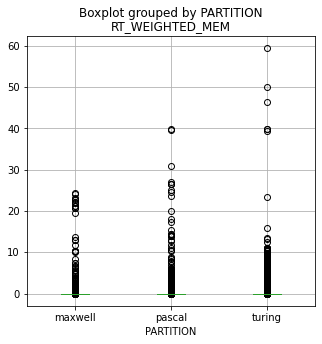

In [37]:
boxplot = df_test.boxplot(column=['RT_WEIGHTED_MEM'], by='PARTITION', figsize=(5,5))
#boxplot showing boxplot for each runtime weighted memory

In [38]:
#Try new column without dividing out by time--multiply usedmem * usedtime_sec
df_test['RT_USEDMEM'] = df_test['USEDMEM']*df_test['USEDTIME_SEC']

<ipython-input-38-1ffa2fa62c68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['RT_USEDMEM'] = df_test['USEDMEM']*df_test['USEDTIME_SEC']


In [39]:
df_test.RT_USEDMEM.describe()

count    2.832880e+05
mean     3.714391e+07
std      6.737556e+08
min      0.000000e+00
25%      1.407900e+02
50%      2.563213e+05
75%      8.075387e+05
max      9.538720e+10
Name: RT_USEDMEM, dtype: float64

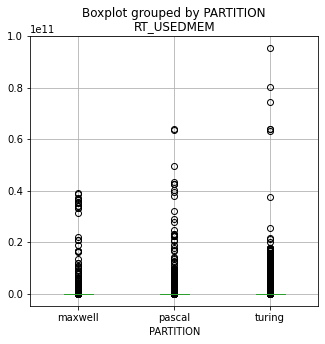

In [40]:
df_test.RT_USEDMEM.describe()
df_test.boxplot(column=['RT_USEDMEM'], by='PARTITION', figsize=(5,5));

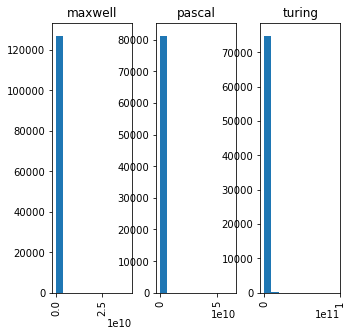

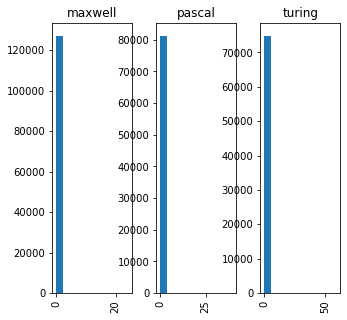

In [41]:
#histogram for runtime*usedmemory
df_test.hist(by = 'PARTITION', column = 'RT_USEDMEM', layout=(1, 3), figsize= (5,5))
plt.show()

#histogram for runtime weighted memory
df_test.hist(by = 'PARTITION', column = 'RT_WEIGHTED_MEM', layout=(1, 3), figsize= (5,5))
plt.show()

In [42]:
df_test.groupby(['PARTITION'])['RT_WEIGHTED_MEM'].agg(['sum'])
#sum of rt_used mem, then divide that by the sum of usedtime

,sum
PARTITION,
maxwell,733.935305
pascal,2140.357038
turing,3688.259024


In [55]:
#df_test.groupby(['PARTITION'])['USEDMEM']*(['USEDTIME_SEC']/(['USEDTIME_SEC'].agg('sum'))
##? Trying to calculate the runtime weighted memory usage after grouping by partition

In [45]:
df_test['Percent_of_Partition_RT'] = df_test['USEDTIME_SEC'] / df_test.groupby('PARTITION')['USEDTIME_SEC'].transform('sum')
#see how much each runtime contributed to the total runtime in the partition's total runtime

<ipython-input-45-08054de10816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Percent_of_Partition_RT'] = df_test['USEDTIME_SEC'] / df_test.groupby('PARTITION')['USEDTIME_SEC'].transform('sum')


In [46]:
df_test.head()

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,USEDTIMEtd,USEDTIME_SEC,RT_WEIGHTED_MEM,RT_USEDMEM,Percent_of_Partition_RT
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED,0 days 00:13:13,793.0,0.000009,14797.38,9.539227e-07
1,32880701,glasshouse,brady,0.00,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED,0 days 00:00:22,22.0,0.000000,0.00,9.860368e-08
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED,0 days 00:08:57,537.0,0.000135,216045.84,2.406826e-06
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED,0 days 05:09:46,18586.0,0.004841,7761885.32,2.235764e-05
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED,0 days 04:11:10,15070.0,0.004230,6782856.30,1.812814e-05


In [49]:
df_test['Percent_of_Partition_RT_USEDMEM'] = df_test['Percent_of_Partition_RT']*df_test['USEDMEM']

<ipython-input-49-6daf929b0d80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Percent_of_Partition_RT_USEDMEM'] = df_test['Percent_of_Partition_RT']*df_test['USEDMEM']


In [54]:
df_test.groupby(['PARTITION']).apply(lambda x: x['Percent_of_Partition_RT_USEDMEM']/x['GPUS'])

PARTITION        
maxwell    1         0.000000
           2         0.000968
           243       0.000000
           462       0.000975
           467       0.000954
                       ...   
turing     336933    0.000013
           336934    0.019401
           336936    0.000069
           336942    0.003458
           336948    0.000023
Length: 283288, dtype: float64

In [ ]:
x

In [ ]:
df['MEM_PER_GPU'] = df['RT_USEDMEM']/df['GPUS']


In [ ]:
df.head()

In [ ]:
#make new column 'weighted_memory'
#df['WEIGHTED_MEMORY'] = df['USEDMEM']/df['GPUS']

In [ ]:
#DF['WEIGHTED_MEMORY'] = d['MEM']/df['GPUS']*df['USEDTIME']

In [ ]:
#w = df.groupby('PARTITION')['weighted_memory'].agg('sum')
#turing uses more memory and for longer--the average went up when accounting for how long-the memory usage is much higher
#job using more memory and time is more influential, 
#weighted and unweighted - when not accounting for length, pascal and maxwell much shorter times
##calculate duration/job
#maxwell more popular but jobs run much shorter
#distribution of different states




In [57]:
#df_[df['GPUS'] > 4].groupby(['PARTITION']).count()/df1[df1['GPUS'] > 4]

NameError: name 'df1' is not defined